In [1]:
from sparkpdf import *

spark = start()

Spark version: 3.5.3
Spark Pdf version: 0.0.1


24/10/25 10:48:20 WARN Utils: Your hostname, nmelnik-1-0 resolves to a loopback address: 127.0.1.1; using 192.168.0.105 instead (on interface wlo1)
24/10/25 10:48:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/25 10:48:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/10/25 10:48:21 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/10/25 10:48:21 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.



    Image#: 0
    Path: InvoiceforMedicalRecords_10_722.png
    Resolution: 0 dpi
    Size: 1414 x 2000 px


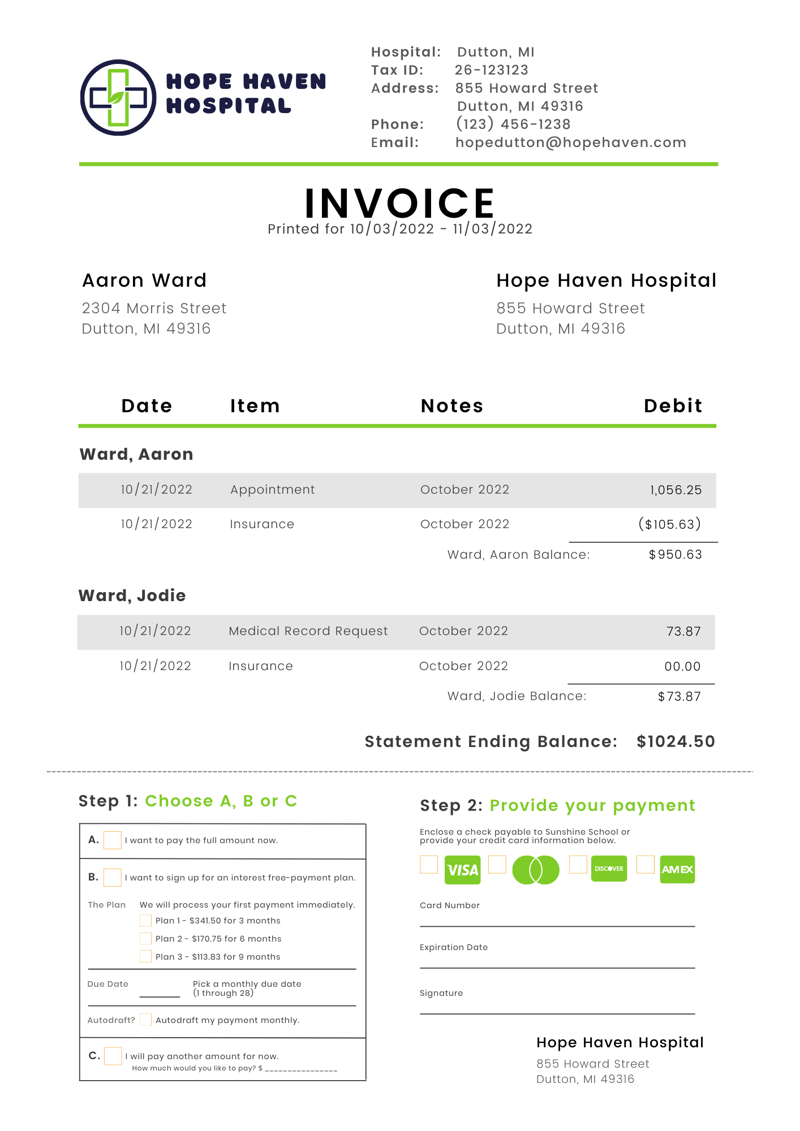

In [2]:
image_example = "../../sparkpdf/resources/images/InvoiceforMedicalRecords_10_722.png"
df = spark.read.format("binaryFile") \
    .load(image_example)

df.show_image("content")

In [3]:
pipeline = PipelineModel(stages=[
    DataToImage(inputCol="content", outputCol="image"),
    TesseractOcr(inputCol="image", outputCol="text", psm=11, keepInputData=True),
    Ner(model="obi/deid_bert_i2b2", inputCol="text", outputCol="ner", keepInputData=True),
    ImageDrawBoxes(inputCols=["image", "ner"], outputCol="image_with_boxes")
])

result = pipeline.transform(df).cache()

result.show()

+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|                path|    modificationTime|length|                text|                 ner|    image_with_boxes|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+
|file:/home/nmelni...|2024-10-19 07:19:...|289502|{file:/home/nmeln...|{file:/home/nmeln...|{file:/home/nmeln...|
+--------------------+--------------------+------+--------------------+--------------------+--------------------+


In [4]:
result.show_ner(limit=20)

+------------+-------------------+----------+-----+---+--------------------+
|entity_group|              score|      word|start|end|               boxes|
+------------+-------------------+----------+-----+---+--------------------+
|        HOSP| 0.9912750720977783|  Hospital|    0|  8|[{Hospital:, 0.96...|
|         LOC| 0.9991676807403564|    Dutton|   10| 16|[{Dutton,, 0.9660...|
|         LOC| 0.9992520213127136|        MI|   18| 20|[{MI, 0.951905364...|
|          ID|  0.693984866142273|        26|   29| 31|[{26-123123, 0.90...|
|       PHONE|0.46331652998924255|         -|   31| 32|[{26-123123, 0.90...|
|       PHONE| 0.7749894261360168|    123123|   32| 38|[{26-123123, 0.90...|
|       STAFF| 0.3706499934196472|      HOPE|   39| 43|[{HOPE, 0.9536704...|
|        HOSP|   0.94090336561203|     HAVEN|   44| 49|[{HAVEN, 0.963343...|
|         LOC| 0.9975549578666687|855 Howard|   59| 69|[{855, 0.96866935...|
|         LOC| 0.9984481334686279|    Street|   70| 76|[{Street, 0.95855...|

In [5]:
result.visualize_ner(labels_list=["DATE", "LOC"])


    Image#: 0
    Path: InvoiceforMedicalRecords_10_722.png
    Resolution: 0 dpi
    Size: 1414 x 2000 px


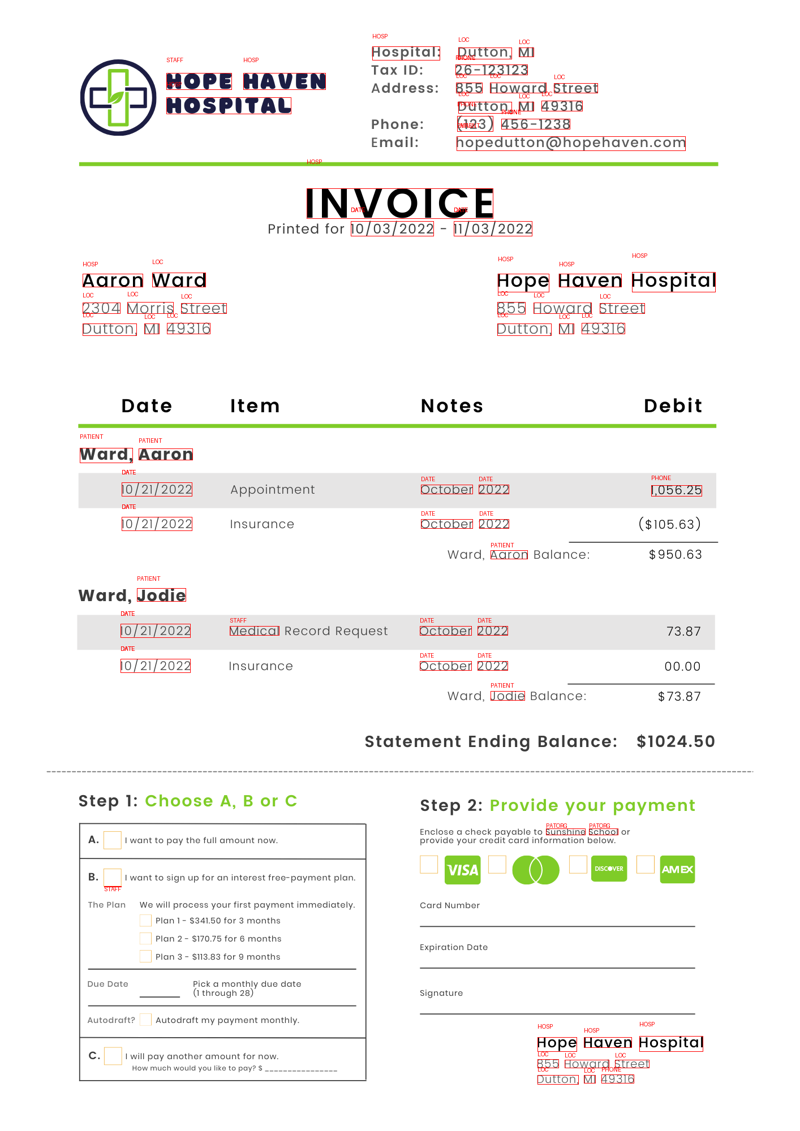

In [6]:
result.show_image("image_with_boxes")